En este notebook vamos a verificar la correlación de los datos para visualizar la relación entre las variables.

## Librerías

In [43]:
import pandas as pd
import numpy as np
import os
from pathlib import PurePath
import matplotlib.pyplot as plt
import seaborn as sns

## Carga de datos

In [81]:
root = r"C:\Users\Isai\Documents\Tesis\code\data_analysis\all_vars\zafra2022"

In [82]:
dfs = [pd.read_csv(PurePath(root, f), parse_dates=True) for f in os.listdir(root) if f.endswith(".csv")]

In [83]:
to_concat = []
for i in dfs:    
    i['Fecha'] = pd.to_datetime(i['Fecha'])
    i['kc'] = 1.15 * i['ndvi'] + 0.17
    i['etc'] = i['kc'] * i['et']
    i['etc_acum'] = i['etc'].cumsum()
    to_concat.append(i)
    
df = pd.concat(to_concat, ignore_index=True, axis=0)

In [88]:
df.corr(method='spearman')

,Parcela,Fecha,dias,ndvi,ndmi,msi,temp,dia_x,reconstruida_temp,ajustados_temp,...,dia,reconstruida_et,ajustados_et,et_acum,et_acum_ajustados,rh12,holtwinters_predicts,kc,etc,etc_acum
Parcela,1.000000,-0.020915,-0.021915,-0.028569,-0.016783,0.019467,-0.002520,-0.020915,-0.002580,0.003621,...,-0.020915,-0.017244,-0.014274,-0.037581,-0.028289,-0.001873,-0.003397,-0.028569,-0.032884,-0.052693
Fecha,-0.020915,1.000000,0.940400,0.541127,0.616622,-0.626625,-0.591300,1.000000,-0.616391,-0.652999,...,1.000000,-0.659776,-0.676005,0.909668,0.926584,0.183735,0.192047,0.541127,-0.151088,0.910960
dias,-0.021915,0.940400,1.000000,0.577008,0.668563,-0.680789,-0.578442,0.940400,-0.602565,-0.641026,...,0.940400,-0.650240,-0.674372,0.988317,0.991537,0.180653,0.189778,0.577008,-0.100698,0.988769
ndvi,-0.028569,0.541127,0.577008,1.000000,0.959036,-0.967447,-0.400463,0.541127,-0.406012,-0.358416,...,0.541127,-0.601303,-0.592543,0.573907,0.570338,0.409327,0.429268,1.000000,0.155688,0.625015
ndmi,-0.016783,0.616622,0.668563,0.959036,1.000000,-0.992951,-0.430468,0.616622,-0.440095,-0.417365,...,0.616622,-0.596859,-0.600830,0.655558,0.653511,0.345289,0.360442,0.959036,0.138448,0.718482
msi,0.019467,-0.626625,-0.680789,-0.967447,-0.992951,1.000000,0.447713,-0.626625,0.457350,0.432847,...,-0.626625,0.618112,0.622903,-0.672058,-0.668696,-0.357342,-0.373596,-0.967447,-0.118324,-0.730001
temp,-0.002520,-0.591300,-0.578442,-0.400463,-0.430468,0.447713,1.000000,-0.591300,0.952088,0.817383,...,-0.591300,0.866346,0.820125,-0.557830,-0.571441,-0.196853,-0.194070,-0.400463,0.645537,-0.559297
dia_x,-0.020915,1.000000,0.940400,0.541127,0.616622,-0.626625,-0.591300,1.000000,-0.616391,-0.652999,...,1.000000,-0.659776,-0.676005,0.909668,0.926584,0.183735,0.192047,0.541127,-0.151088,0.910960
reconstruida_temp,-0.002580,-0.616391,-0.602565,-0.406012,-0.440095,0.457350,0.952088,-0.616391,1.000000,0.844474,...,-0.616391,0.895008,0.842911,-0.580247,-0.594485,-0.180825,-0.189265,-0.406012,0.596237,-0.581739
ajustados_temp,0.003621,-0.652999,-0.641026,-0.358416,-0.417365,0.432847,0.817383,-0.652999,0.844474,1.000000,...,-0.652999,0.784747,0.918804,-0.607383,-0.622884,-0.037673,-0.035919,-0.358416,0.578740,-0.609716


## Correlación

          ndvi        et
ndvi  1.000000 -0.571983
et   -0.571983  1.000000


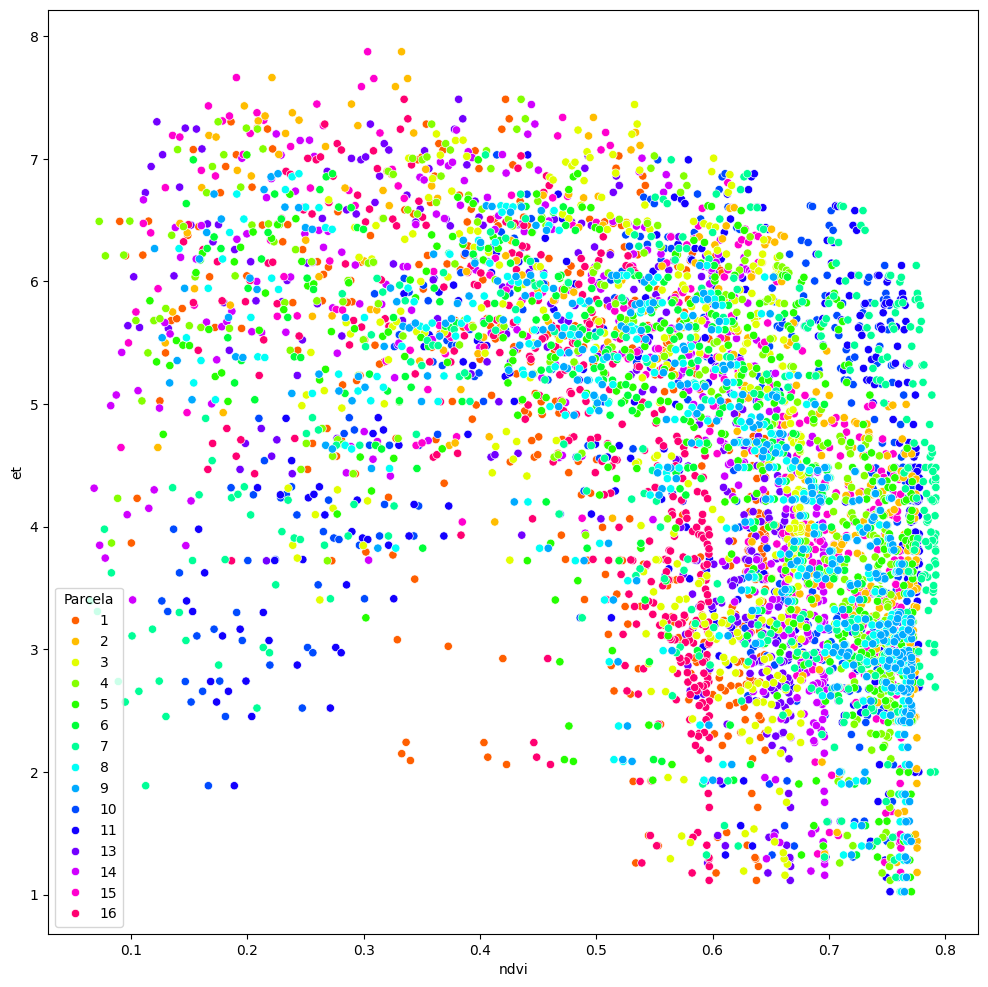

In [94]:
ids = df['Parcela'].unique()
palette = sns.color_palette("hsv", len(ids))
print(df[['ndvi', 'et']].corr(method='spearman'))

plt.figure(figsize=(12, 12))
sns.scatterplot(data=df, x='ndvi', y='et', hue='Parcela', palette=palette)
plt.legend(title='Parcela')
plt.show()